<a href="https://colab.research.google.com/github/elcesi/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG3/AG3_C%C3%A9sar_Gonz%C3%A1lez_Ram%C3%ADrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG3- Actividad Guiada 3<br>
César González Ramírez<br>
url:https://github.com/elcesi/03MAIR-Algortimos-de-optimizacion/tree/master/AG3

In [0]:
!pip install networkx
!pip install tsplib95

    100% |████████████████████████████████| 1.6MB 8.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
Successfully built networkx
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: networkx 2.2
    Uninstalling networkx-2.2:
      Successfully uninstalled networkx-2.2


In [0]:
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import tsplib95
import random
from math import e

In [0]:
file = "swiss42.tsp"

urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp", file)



problem = tsplib95.load_problem(file)



Nodos = list(problem.get_nodes())


Aristas = list(problem.get_edges())

In [0]:
print("Nodos", Nodos)
print("Aristas", Aristas)

Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


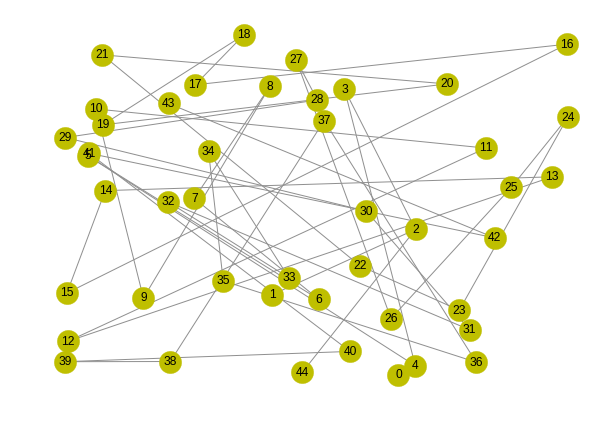

In [0]:
def dibujar_grafo(Nodos, Aristas):
  
  G=nx.Graph()
  
  G.clear()

 
  G.add_nodes_from(Nodos)
  print(Nodos)


  
  aristas = Aristas +  [(70 ,1 )]
  
  G.add_edges_from(aristas)


  

  labels = {}
  for idx, node in enumerate(G.nodes()):
      labels[node] =  idx 

  nx.draw_random(G,node_color='y',edge_color='#909090',node_size=500, labels = labels )


Nodos = list(map( lambda x:problem.get_display(x) ,problem.get_nodes()))
Aristas = list(map(lambda x: (x,x+1), problem.get_nodes()))

print(Aristas)


dibujar_grafo(Nodos, Aristas)

In [0]:

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
      
      

def crear_solucion(Nodos): 
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 




def distancia(a,b, problem):
  return problem.wfunc(a,b)



def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


solucion = crear_solucion(Nodos)

distancia_total(solucion, problem)

4790

In [0]:
def busqueda_aleatoria(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia = distancia_total(solucion, problem)
    
    if distancia < mejor_distancia:
      mejor_solucion = solucion
      mejor_distancia = distancia
      
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  

    
    
sol = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 27, 35, 31, 17, 37, 28, 3, 2, 15, 36, 33, 26, 18, 16, 7, 30, 1, 40, 23, 39, 4, 41, 34, 6, 10, 25, 5, 12, 20, 14, 19, 13, 11, 29, 38, 24, 21, 22, 9, 32, 8]
Distancia     : 3582


In [0]:
def genera_vecina(solucion):
  

  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      
      
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      
      
      
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


solucion = crear_solucion(Nodos)
print(solucion)

nueva_solucion = genera_vecina(solucion)
print(nueva_solucion)

[0, 34, 22, 39, 8, 31, 23, 13, 29, 27, 11, 17, 3, 14, 28, 36, 12, 24, 30, 6, 19, 10, 26, 1, 15, 4, 5, 2, 32, 33, 38, 18, 16, 40, 9, 21, 41, 20, 37, 35, 25, 7]
[0, 34, 22, 39, 8, 25, 23, 13, 29, 27, 11, 17, 3, 14, 28, 36, 12, 24, 30, 6, 19, 10, 26, 1, 15, 4, 5, 2, 32, 33, 38, 18, 16, 40, 9, 21, 41, 20, 37, 35, 31, 7]


In [0]:
def busqueda_local(problem, N):
  mejor_solucion = []
  mejor_distancia = 10e100
  
  Nodos = list(problem.get_nodes())
  
  solucion_referencia = crear_solucion(Nodos)

  for i in range(N):
    vecina = genera_vecina(solucion_referencia)
    distancia_vecina = distancia_total(vecina, problem)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
      
    solucion_referencia = vecina
  
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  
  
  


sol = busqueda_local(problem, 100)

Mejor solución: [0, 34, 20, 31, 17, 37, 19, 13, 18, 12, 11, 25, 8, 29, 30, 9, 39, 22, 38, 32, 28, 2, 27, 3, 4, 1, 36, 35, 33, 21, 24, 40, 23, 41, 10, 26, 5, 6, 14, 16, 15, 7]
Distancia     : 1877


In [0]:
def genera_vecina_aleatorio(solucion):
  
  
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
  
  return vecina


def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False

def bajar_temperatura(T):
  return T-1

In [0]:
def recocido_simulado(problem, TEMPERATURA):
  
  
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  while TEMPERATURA > 0:
    
    vecina = genera_vecina(solucion_referencia)
    
    
    distancia_vecina = distancia_total(vecina, problem)
    
    
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol = recocido_simulado(problem, 100)

La mejor solución encontrada es [0, 3, 27, 2, 28, 8, 41, 10, 25, 11, 12, 18, 30, 29, 9, 23, 40, 24, 21, 39, 31, 35, 36, 17, 37, 15, 16, 14, 7, 20, 33, 34, 38, 22, 32, 4, 19, 13, 5, 26, 6, 1]
con una distancia total de 1756


In [0]:
def Add_Nodo(problem, H ,T ) :
  
  
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H ) :
  
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T ):
  
  
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

In [0]:
def hormigas(problem, N) :
  
  
    
  
  Nodos = list(problem.get_nodes())
    
  Aristas = list(problem.get_edges()) 
  
  
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  
  Hormiga = [[0] for _ in range(N)]
  
  
  for h in range(N) :
    
    
    for i in range(len(Nodos)-1) :
      
      
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
     
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    
      
     
    T = Evaporar_Feromonas(T)
    

    
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print(mejor_solucion)
  print(mejor_distancia)
  
  
hormigas(problem, 1000)

[0, 39, 29, 33, 4, 3, 8, 22, 38, 35, 17, 19, 31, 36, 20, 28, 37, 7, 5, 11, 16, 14, 26, 10, 34, 27, 12, 9, 24, 40, 41, 1, 13, 15, 2, 18, 6, 32, 23, 21, 30, 25]
3631
